## Machine Traslation,MT (기계번역) 

번역이란 언어로 된 글을 다른 언어의 글로 옮기는 것으로 정의 된다. 

번역의 궁금적인 목표는 어떤 언어 f 문장이 주어졌을 때, 가능한 e언어의 번역 문장 중에서 최대 확률을 가진 $/hat{e}$ 찾아내는 것이다. 

$\hat{e} = argmax P_f ->_e(e|f)$

## Rule-Based Machine Translation, RBMT

주어진 문장의 구조를 분석하고, 그 분석에 따라 규칙을 세운 후, 분류를 나누어 정해진 규칙에 따라 번역한다. 

규칙을 사람이 일일이 만들어야하기 때문에 자원과 시간의 소용 비용이 높다는 단점이 존재한다. 

## Statistical Machine Translation, SMT

대량의 양방향 코퍼스에서 통계를 얻어내어 번역 시스템 구성, 원본 텍스트와 기존 인간 번역 간의 통계 관계를 분석하여 번역을 학습한다.

* Word-based translation: The model generates the translation word-by-word.

* Phrase-based translation: The model translates sequences of words.
* Syntax-based translation: The model translates syntactic units.

* Hierarchical phrase-based translation: The model combines phrase-based methods with syntax-based methods.


## Seq2seq(Sequence to sequence) 

한 도메인(예, 영어 문장)에서 다른 도메인(예, 한국어 문장)으로 시퀀스 (Sequence)를 변환하는 모델이다. 

시퀀스를 다루는 모델이므로 당연히 순차데이터를 대상으로 함. 주로 시계열 데이터에 대하여 많이 활용됨 , 대표적인 시퀀스 모델인 RNN 모델을 기반으로 하고 있음

2개의 RNN 모델을 이용하여 인코더와 디코더를 구현하였고, 이 때문에 Encoder-Decoder 모델이라고도 부른다. 


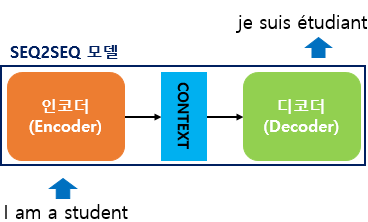

Seq2seq 모델은 인코더와 디코더라는 두개의 모듈로 구성된다. 인코더는 입력 문장의 모든 단어들을 순차적으로 입력 받은 뒤에 마지막에. 이 모든 단어 정보들을 압축해서 하나의 벡터로 만드는데, 이를 context vector라고 한다. 

입력 문장의 정보가 하나의 context vector로 모두 압축되면 인코더는 context vector를 디코더로 전송한다. 디코더는 context vector를 받아서 번역된 단어를 한 개씩 순차적으로 출력한다. 

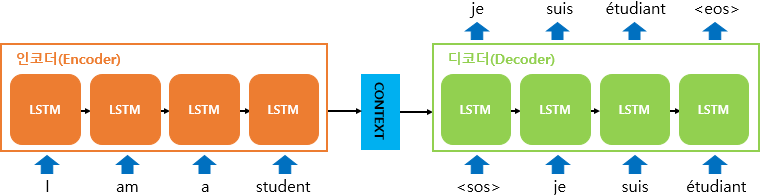

인코더와 디코더 아키텍처의 내부를 살펴보면 두개의 RNN으로 구성되어 있다. 입력 문장을 받는 RNN셀을 인코더라고 하고, 출력 문장을 출력하는 RNN 셀을 디코더라고 한다. 

인코더에서 입력 문장은 단어 토큰화를 통해서 단어 단위로 쪼개지고 단어 토큰 각각은 RNN셀의 각 시점의 입력이 된다. 인코더 RNN셀은 모든 단어를 입력 받은 뒤에 인코더 RNN셀의 마지막 시점의 은닉상태를 디코더 RNN 셀로 넘져주는데 이를 context vextor라고 한다. context vector는 디코더 RNN셀의 첫번 째 은닉 상태에 사용된다.

-------------
**test 과정 설명** 

디코더는 기본적으로 RNNLM(RNN Language Model)이다.  디코더는 초기 입력으로 문장의 시작을 의미하는 심볼 <sos>가 들어 간다. 디코더는 <sos>가 입력되면, 다음에 등장할 확률이 높은 단어를 예측한다. 
    
첫번째 시점(time step)의 디코더 RNN 셀은 다음에 등장할 단어로 je를 예측하였다. 첫번째 시점의 디코더 RNN 셀은 예측된 단어 je를 다음 시점의 RNN 셀의 입력으로 입력한다. 
    
두번째 시점의 디코더 RNN 셀은 입력된 단어 je로부터 다시 다음에 올 단어인 suis를 예측하고, 또 다시 이것을 다음 시점의 RNN 셀의 입력으로 보낸다. 디코더는 이런 식으로 기본적으로 다음에 올 단어를 예측하고, 그 예측한 단어를 다음 시점의 RNN 셀의 입력으로 넣는 행위를 반복한다. 이 행위는 문장의 끝을 의미하는 심볼인 <eos>가 다음 단어로 예측될 때까지 반복된다. 

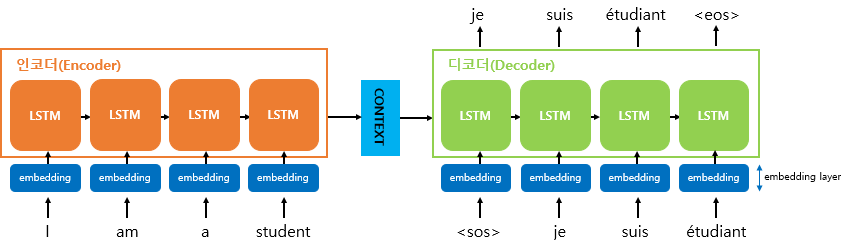

훈련 과정에서는 디코더에게 인코더가 보낸 context vector와 실제 정답인 상황인 <sos> je suis étudiant를 입력 받았을 때, je suis étudiant <eos>가 나와야 된다고 정답을 알려주면서 훈련한다. 
    
    
 반면 테스트 과정에서는 앞서 설명한 과정과 같이 디코더는 오직 컨텍스트 벡터와 <sos>만을 입력으로 받은 후에 다음에 올 단어를 예측하고, 그 단어를 다음 시점의 RNN 셀의 입력으로 넣는 행위를 반복한다. 

#### seq2seq의 목적은 모델 구조를 이용하여 MLE를 수행, 주어진 데이터를 가장 잘 설명하는 파라미터 ${\theta}$ 를 찾는 것이다. 


* 모수가 주어졌을 때, 원하는 값들이 나올 가능도 함수를 최대로 만드는 모수를 선택하는 방법


${\theta} = argmax P(Y|X ; {\theta} )$𝒘𝒉𝒆𝒓𝒆 𝑿 = {𝒙𝟏,𝒙𝟐,⋯𝒙𝒏} ,𝒀 = {𝒙𝟏,𝒚𝟐,⋯𝒚𝒎} 


${\theta} = argmax P(Y|X ; {\theta} )$를 최대로 하는 모델 파라미터를 찾는 작업 

파라미터에 대한 학습이 완료되면 사후확률을 최대로 하는 Y도출 

$\hat{Y} = argmaxP(Y|X ; {\theta} )$ 

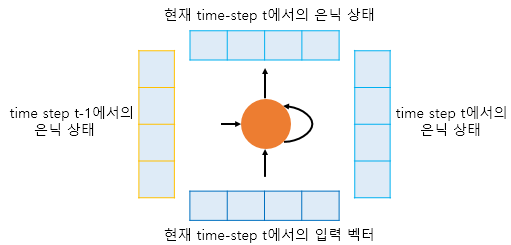

현재 시점(time step)을 t라고 할 때, RNN 셀은 t-1에서의 은닉 상태와 t에서의 입력 벡터를 입력으로 받고, t에서의 은닉 상태를 만든다. 이때 t에서의 은닉 상태는 바로 위에 또 다른 은닉층이나 출력층이 존재할 경우에는 위의 층으로 보내거나, 필요없으면 값을 무시할 수 있다. RNN 셀은 다음 시점에 해당하는 t+1의 RNN 셀의 입력으로 현재 t에서의 은닉 상태를 입력으로 보낸다. 이런 구조에서 현재 시점 t에서의 은닉 상태는 과거 시점의 동일한 RNN 셀에서의 모든 은닉 상태의 값들의 영향을 누적해서 받아온 값이라고 할 수 있다.

앞서 언급했던 컨텍스트 벡터는 사실 인코더에서의 마지막 RNN 셀의 은닉 상태값을 말하는 것이며, 이는 입력 문장의 모든 단어 토큰들의 정보를 요약해서 담고있다고 할 수 있다. 



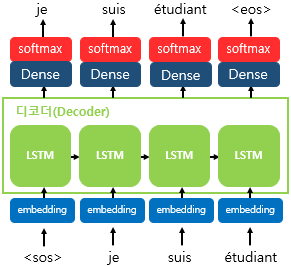

디코더는 인코더의 마지막 RNN 셀의 은닉 상태인 컨텍스트 벡터를 첫번째 은닉 상태의 값으로 사용한다.  디코더의 첫번째 RNN 셀은 이 첫번째 은닉 상태의 값과, 현재 t에서의 입력값인 <sos>로부터, 다음에 등장할 단어를 예측한다. 이 예측된 단어는 다음 시점인 t+1 RNN에서의 입력값이 되고, 이 t+1에서의 RNN 또한 이 입력값과 t에서의 은닉 상태로부터 t+1에서의 출력 벡터. 즉, 또 다시 다음에 등장할 단어를 예측하게 될 것이다. 
    
    
출력 단어로 나올 수 있는 단어들은 다양한 단어들이 있다. seq2seq 모델은 선택될 수 있는 모든 단어들로부터 하나의 단어를 골라서 예측해야 한다. 이를 예측하기 위해서 쓸 수 있는 함수는 소프트맥스 함수이다. 디코더에서 각 시점(time step)의 RNN 셀에서 출력 벡터가 나오면, 해당 벡터는 소프트맥스 함수를 통해 출력 시퀀스의 각 단어별 확률값을 반환하고, 디코더는 출력 단어를 결정한다, 

### seq2seq의 활용 분야

특정 도메인의 시계열 데이터 또는 시퀀스 데이터 입력을 , 다른 도메인의 시계열 또는 시퀀스 데이터로 출력하는데 탁월한 능력을 보인다.


* 기계 번역  특정 언어 문장을 입력으로 받아 다른 언어의 문장으로 출력
* 챗봇사용자의 문장 입력을 받아 대답을 출력
* 문서 요약 긴 문장을 입력으로 받아 같은 언어의 요약된 문장으로 출력
* 기타 자연어 처리사용자의 문장 입력을 받아 프로그래밍 코드로 출력 등
* 음성 인식사용자의 음성을 입력으로 받아 해당 언어의 문자열(문장)로 출력
* 독순술입술 움직임의 동영상을 입력으로 받아 해당 언어의 문장으로 출력
* 이미지 캡셔닝변형된 seq2seq를 사용하여 이미지를 입력으로 받아 그림을 설명하는 문장을 출력

### 한계점 

seq2seq는 오토인코더(AutoEncoder)의 일종으로 특히 시계열 또는 시퀀스
데이터에 강점이 있는 모델이라고 볼 수 있음

* 장기 기억력 문제
- 신경망 모델은 차원축소를 통한 데이터 압축에 탁월한 성능을 보이지만 정보를 무한하게 압축할 수는 없음→압축 가능한 정보량의 한계 , 문장(또는 time-step)이 길어질수록 압축 성능 하락
- LSTM, GRU 등을 사용하여 RNN보다는 높은 성능을 낼 수 있지만 역시 한계가 존재한다. 

* 구조 정보의 부재
* 챗봇 또는 QA봇 ,지속적인데이터,정보 추가가 필요하지않은 번역,요약과 달리 대화의 경우 지속적인 관리가 요구되지만 해당하는 구조적 기능이 부족함 , 발전된 구조 요구
 